## Preliminaries

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, auc

## Recipient Only

### Data Preprocessing

In [2]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



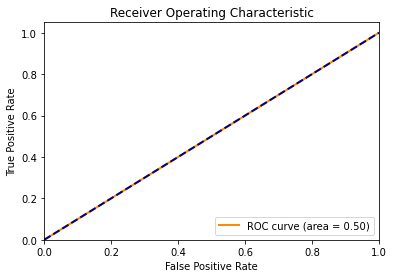

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

### Model (Backwards Selected Features)

Note: Backwards selected features were found using the MASS library 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



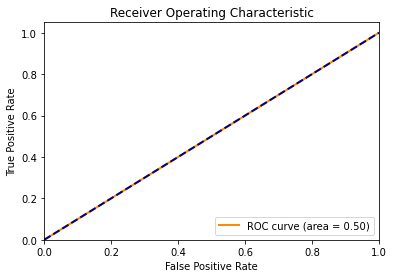

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
# Select features
df_backwards = df[df.columns[[2, 7, 9, 14, 18, 20, 21, 23, 27, 28, 29, 30, 32, 38, 40, 46, 53, 54, 56]]]

# Features and Output
X = df_backwards.iloc[:, :-1]
y = df_backwards.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

### Model (Non-Lab Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



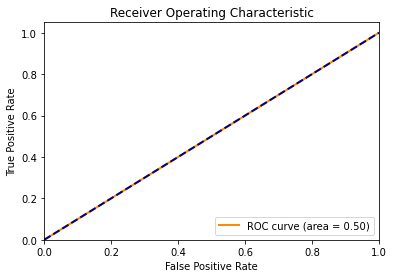

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
# Get non-lab features
df_nonlab = df.iloc[:, :23]

# Features and Output
X = df_nonlab
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)


### Model (Lab Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



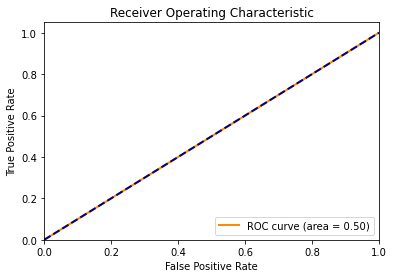

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
# Get lab features
df_lab = df.iloc[:, 24:]

# Features and Output
X = df_lab.iloc[:, :-1]
y = df_lab.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)


## Recipient and Donor

### Data Preprocessing

In [7]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



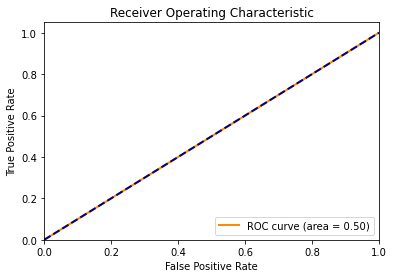

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [8]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print(clf.coef_)

## Recipient and Donor and Operation

### Data Preprocessing

In [9]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

### Model (All Features)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       348
           1       0.00      0.00      0.00       123

    accuracy                           0.74       471
   macro avg       0.37      0.50      0.42       471
weighted avg       0.55      0.74      0.63       471



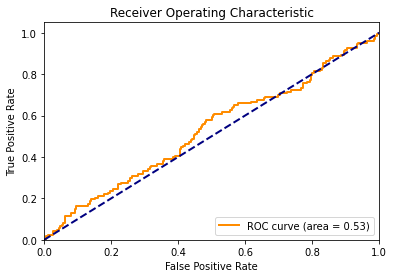

In [10]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [11]:
# Filter out features with nonzero coefficients
result = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# print(result)

## Recipient, Donor, Operation, Complications

### Data Preprocessing

In [23]:
# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_comp_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       348
           1       0.14      0.01      0.02       123

    accuracy                           0.73       471
   macro avg       0.44      0.50      0.43       471
weighted avg       0.58      0.73      0.63       471



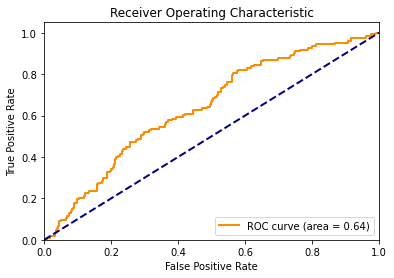

In [24]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Filter out features with nonzero coefficients
result = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# result

### Remove Continuous Variables

In [26]:
# Select columns to remove
cols_to_remove = ['BMI_TSRF', 'KDPI']

# Load in dataframe
df = pd.read_csv("/Users/stevenswee/Desktop/BE M227/Processed_Data/encoded_recipient_donor_op_comp_df.csv")

# Get all but first column
df = df.iloc[:, 1:]

# Filter out columns
df = df.drop(columns = cols_to_remove)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       348
           1       0.14      0.01      0.02       123

    accuracy                           0.73       471
   macro avg       0.44      0.50      0.43       471
weighted avg       0.58      0.73      0.63       471



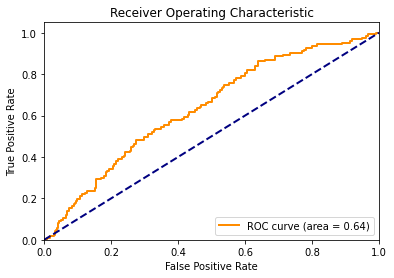

In [27]:
# Features and Output
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = LogisticRegressionCV(cv = 5, Cs = np.logspace(-4, 4, 10), penalty = 'l1', solver = 'saga', max_iter = 10000, random_state = 42).fit(X_train, y_train)

# Get classification report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division = 0.0))

# AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# Filter out features with nonzero coefficients
result_new = [features for coefficients, features in zip(clf.coef_[0], X_test.columns) if coefficients != 0]
# result_new

In [29]:
# Determine which features are different
difference = list(set(result) - set(result_new))
print(difference)

['dd_HEP_C_ANTIBODY_STATUS', 'd_ETHNICITY_RACE_Black or African American', 'd_CREATININE', 'HIGHEST_ED_LEVEL_Attended college/Technical school', 'd_ETHNICITY_RACE_White', 'BMI_TSRF', 'KDPI']
